# Data Cleansing and Preparation: Part II

Import libraries

In [152]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

Using pandas to read csv for assignment seven

In [153]:
products = pd.read_csv('assignment_seven.csv')

Reading first five rows of data 

In [154]:
products.head()

,transaction_id,transaction_date,full_name,record_id,products
0,1,7/19/2021,Izzy Janssens,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,TERBUTALINE SULFATE
1,2,9/25/2021,Timmy Sanches,afaf2462-41b1-43dc-8702-264cf2a6ade0,Fentanyl
2,3,10/7/2021,Skyler Rawlcliffe,34528325-deb3-4deb-9107-12a89f5d1cfc,Lorazepam
3,4,5/26/2022,Torrance Petteford,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,5,12/17/2021,Bendite Fardon,b0eb4c68-5737-4076-856d-7eacf2e6014d,Oxygen


Dropping all real names per Federal guidelines, so removing "full_name" column 

In [155]:
products.drop('full_name', axis=1, inplace=True)

Making sure the names dropped

In [156]:
products.head()

,transaction_id,transaction_date,record_id,products
0,1,7/19/2021,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,TERBUTALINE SULFATE
1,2,9/25/2021,afaf2462-41b1-43dc-8702-264cf2a6ade0,Fentanyl
2,3,10/7/2021,34528325-deb3-4deb-9107-12a89f5d1cfc,Lorazepam
3,4,5/26/2022,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,5,12/17/2021,b0eb4c68-5737-4076-856d-7eacf2e6014d,Oxygen


Created heatmap to show which columns had null values

<AxesSubplot:>

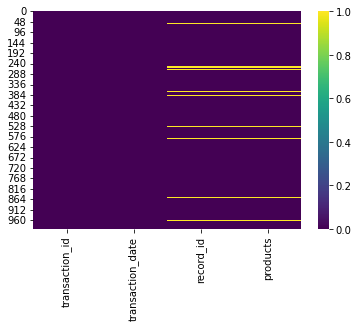

In [157]:
sns.heatmap(products.isnull(), cmap='viridis')

As seen in heatmap above, there are null values in "record_id" and "products" columns

Dropping null values from "record_id" and "products"

In [158]:
products = products.dropna(subset=['record_id'])

In [159]:
products = products.dropna(subset=['products'])

Checking to make sure null values dropped from each column

In [160]:
products['record_id'].isnull().values.any()

False

In [161]:
products['products'].isnull().values.any()

False

Saving new dataset as "output.csv"

In [162]:
products.to_csv('output.csv') 

Using pandas to read output.csv dataset 

In [163]:
output = pd.read_csv('output.csv')

In [165]:
output.head()

,transaction_id,transaction_date,record_id,products
0,1,7/19/2021,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,TERBUTALINE SULFATE
1,2,9/25/2021,afaf2462-41b1-43dc-8702-264cf2a6ade0,Fentanyl
2,3,10/7/2021,34528325-deb3-4deb-9107-12a89f5d1cfc,Lorazepam
3,4,5/26/2022,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,5,12/17/2021,b0eb4c68-5737-4076-856d-7eacf2e6014d,Oxygen


Creating copy of output.csv to work with

In [166]:
output_copy = output.copy()

Splitting the strings of column 'products' by , and then vertically expanded the rows using explode() method to let each element have its own row


In [174]:
output_copy['products'] = output_copy['products'].str.split(', ')
output_copy = output_copy.explode('products')
output_copy

,transaction_id,transaction_date,record_id,products
0,1,7/19/2021,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,terbutaline sulfate
1,2,9/25/2021,afaf2462-41b1-43dc-8702-264cf2a6ade0,fentanyl
2,3,10/7/2021,34528325-deb3-4deb-9107-12a89f5d1cfc,lorazepam
3,4,5/26/2022,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,5,12/17/2021,b0eb4c68-5737-4076-856d-7eacf2e6014d,oxygen
...,...,...,...,...
962,996,5/26/2022,67a9dcee-3784-482a-9505-2665a7c1cc02,ganciclovir sodium
963,997,9/11/2021,7d36bb32-112c-4836-ba3d-6e3bbbbc82d8,atovaquone
964,998,11/25/2021,421ff0bb-919c-4dd8-af59-db9fd3ea3248,sour dock sheep sorrel
965,999,3/11/2022,fe266fd4-c22f-4d3f-a276-74016092df33,octinoxate


Reset index to get rid of duplicate indices. 

In [175]:
output_copy.reset_index(drop=True)

,transaction_id,transaction_date,record_id,products
0,1,7/19/2021,1df9f42a-8c0f-4e3d-aeca-5bd310dd277a,terbutaline sulfate
1,2,9/25/2021,afaf2462-41b1-43dc-8702-264cf2a6ade0,fentanyl
2,3,10/7/2021,34528325-deb3-4deb-9107-12a89f5d1cfc,lorazepam
3,4,5/26/2022,6e379186-e61e-4926-ad03-0ac7759d7fab,risperidone
4,5,12/17/2021,b0eb4c68-5737-4076-856d-7eacf2e6014d,oxygen
...,...,...,...,...
1401,996,5/26/2022,67a9dcee-3784-482a-9505-2665a7c1cc02,ganciclovir sodium
1402,997,9/11/2021,7d36bb32-112c-4836-ba3d-6e3bbbbc82d8,atovaquone
1403,998,11/25/2021,421ff0bb-919c-4dd8-af59-db9fd3ea3248,sour dock sheep sorrel
1404,999,3/11/2022,fe266fd4-c22f-4d3f-a276-74016092df33,octinoxate


Making products values all lowercase to properly count

In [170]:
output_copy['products'] = output_copy['products'].str.lower()

Using the value_counts function from pandas to check top 5 most frequent occuring values in "products" column

In [171]:
output_copy['products'].value_counts().head(5)

octinoxate          35
acetaminophen       34
titanium dioxide    29
avobenzone          19
alcohol             18
Name: products, dtype: int64

<AxesSubplot:>

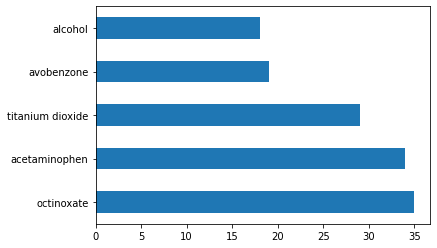

In [172]:
output_copy['products'].value_counts()[:5].plot(kind='barh')